In [1]:
# https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
import numpy as np
from sklearn.model_selection import KFold
import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
from keras.utils import plot_model
nb_classes = 4

Using TensorFlow backend.


In [2]:
# # data_processed.csv
# # load pima indians dataset
# df = pd.read_csv('data_processed.csv')
# # Get testSet
# df_test = df.sample(frac=0.2, random_state=18)
# df_test.to_csv('testSet.csv', index=False)
# # Subtract to get trainingSet
# df_train = df[~df.index.isin(df_test.index)]
# df_train.to_csv('trainingSet.csv', index=False)

In [3]:
trainingSet = pd.read_csv('trainingSet.csv').sample(frac = 1, random_state=18)
testSet = pd.read_csv('testSet.csv').sample(frac = 1, random_state=18)

In [4]:
Y_raw = np.array(trainingSet['Value'])
trainSet_X = trainingSet.drop('Value', axis=1)
X = np.array(trainSet_X)
Y  = np.zeros((len(trainSet_X), nb_classes))
print Y_raw
for i in range(len(Y_raw)):
    Y[i][Y_raw[i] - 1] = 1.0
print X.shape
Y_raw -= [1]

[1 2 1 ... 1 2 1]
(1141, 921)


In [5]:
# Y_test = np.array(testSet['Value'])
# testSet_X = testSet.drop('Value', axis=1)
# X_test = np.array(testSet_X)
# Y_test = Y_test - [1]

In [6]:
# create model
def generate_model(d):
    model = Sequential()
    for i in reversed(range(d)):
        if i < 1:
            break
        if i == 0:
            model.add(Dense(2 ** (i + 3), input_dim=921, activation='relu'))
#             model.add(Dropout(0.2))
        elif i == 1:
            model.add(Dense(2 ** (i + 3), activation='relu'))
#             model.add(Dropout(0.1))
        elif i == 2:
            model.add(Dense(2 ** (i + 3), activation='relu'))
#             model.add(Dropout(0.05))
        
        else:
            model.add(Dense(2 ** (i + 3), activation='relu'))
    
    # The last layer
    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))

    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#     plot_model(model, to_file= str(d) + 'model.pdf')
    return model

In [7]:
kf = KFold(n_splits=5)
kf.get_n_splits(X)
D = [3, 4, 5, 6, 7, 8, 9, 10]

train_dict = {}
test_dict = {}

for d in D:
    train_dict[d] = []
    test_dict[d] = []
    print 'd = ', d
    for train_index, test_index in kf.split(X):
        # print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        Y_train_raw, Y_test_raw = Y_raw[train_index], Y_raw[test_index]
        
        # Fit the model
        model = generate_model(d)
        model.fit(X_train, Y_train, epochs=10, batch_size=10, shuffle=True, class_weight='auto')
        
        # CV Result
        training_res = model.predict(X_train, batch_size=10, verbose=0)
        train_res = np.argmax(training_res, axis=1)
        testing_res = model.predict(X_test, batch_size=10, verbose=0)
        test_res = np.argmax(testing_res, axis=1)
        
        # Get train accuracy
        count = 0
        for i in range((len(X_train))):
            if train_res[i] == Y_train_raw[i]:
                count += 1
        train_dict[d].append(1.0 * count/len(X_train))
        print 1.0 * count/len(X_train)
                             
        # Get test accuracy
        count = 0
        for i in range((len(X_test))):
            if test_res[i] == Y_test_raw[i]:
                count += 1
        test_dict[d].append(1.0 * count/len(X_test))
        print 1.0 * count/len(X_test)

d =  3
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
912/912 [==============================] - 2s 3ms/step - loss: 0.3611 - acc: 0.8594
Epoch 2/10
912/912 [==============================] - 0s 499us/step - loss: 0.2768 - acc: 0.8813
Epoch 3/10
912/912 [==============================] - 0s 508us/step - loss: 0.2240 - acc: 0.9019
Epoch 4/10
912/912 [==============================] - 0s 464us/step - loss: 0.1933 - acc: 0.9128
Epoch 5/10
912/912 [==============================] - 0s 502us/step - loss: 0.1858 - acc: 0.9205
Epoch 6/10
912/912 [==============================] - 0s 504us/step - loss: 0.1547 - acc: 0.9337
Epoch 7/10
912/912 [==============================] - 0s 501us/step - loss: 0.1468 - acc: 0.9389
Epoch 8/10
912/912 [==============================] - 0s 478us/step - loss: 0.1456 - acc: 0.9359
Epoch 9/10
912/912 [==============================] - 0s 504us/step - loss: 0.1409 - acc: 0.9397
Ep

913/913 [==============================] - 1s 564us/step - loss: 0.1403 - acc: 0.9414
Epoch 8/10
913/913 [==============================] - 1s 613us/step - loss: 0.1250 - acc: 0.9499
Epoch 9/10
913/913 [==============================] - 1s 563us/step - loss: 0.1153 - acc: 0.9545
Epoch 10/10
913/913 [==============================] - 1s 605us/step - loss: 0.1138 - acc: 0.9529
0.924424972618
0.837719298246
Epoch 1/10
913/913 [==============================] - 2s 2ms/step - loss: 0.3805 - acc: 0.8401
Epoch 2/10
913/913 [==============================] - 1s 630us/step - loss: 0.3015 - acc: 0.8740
Epoch 3/10
913/913 [==============================] - 1s 657us/step - loss: 0.2263 - acc: 0.9053
Epoch 4/10
913/913 [==============================] - 1s 669us/step - loss: 0.2036 - acc: 0.9107
Epoch 5/10
913/913 [==============================] - 1s 662us/step - loss: 0.1627 - acc: 0.9348
Epoch 6/10
913/913 [==============================] - 1s 647us/step - loss: 0.1529 - acc: 0.9348
Epoch 7/10
9

912/912 [==============================] - 1s 782us/step - loss: 0.1279 - acc: 0.9435
Epoch 10/10
912/912 [==============================] - 1s 808us/step - loss: 0.1300 - acc: 0.9441
0.919956140351
0.890829694323
Epoch 1/10
913/913 [==============================] - 3s 3ms/step - loss: 0.3633 - acc: 0.8551
Epoch 2/10
913/913 [==============================] - 1s 786us/step - loss: 0.2199 - acc: 0.9022
Epoch 3/10
913/913 [==============================] - 1s 792us/step - loss: 0.2257 - acc: 0.8987
Epoch 4/10
913/913 [==============================] - 1s 805us/step - loss: 0.1665 - acc: 0.9236
Epoch 5/10
913/913 [==============================] - 1s 776us/step - loss: 0.1478 - acc: 0.9367
Epoch 6/10
913/913 [==============================] - 1s 735us/step - loss: 0.1775 - acc: 0.9200
Epoch 7/10
913/913 [==============================] - 1s 781us/step - loss: 0.1390 - acc: 0.9387
Epoch 8/10
913/913 [==============================] - 1s 763us/step - loss: 0.1550 - acc: 0.9324
Epoch 9/10
9

Epoch 1/10
913/913 [==============================] - 4s 4ms/step - loss: 0.3630 - acc: 0.8601
Epoch 2/10
913/913 [==============================] - 1s 863us/step - loss: 0.2934 - acc: 0.8746
Epoch 3/10
913/913 [==============================] - 1s 871us/step - loss: 0.2065 - acc: 0.9080
Epoch 4/10
913/913 [==============================] - 1s 832us/step - loss: 0.1587 - acc: 0.9332
Epoch 5/10
913/913 [==============================] - 1s 862us/step - loss: 0.1498 - acc: 0.9324
Epoch 6/10
913/913 [==============================] - 1s 837us/step - loss: 0.1703 - acc: 0.9233
Epoch 7/10
913/913 [==============================] - 1s 860us/step - loss: 0.1466 - acc: 0.9354
Epoch 8/10
913/913 [==============================] - 1s 878us/step - loss: 0.1624 - acc: 0.9318
Epoch 9/10
913/913 [==============================] - 1s 895us/step - loss: 0.1238 - acc: 0.9439
Epoch 10/10
913/913 [==============================] - 1s 875us/step - loss: 0.1336 - acc: 0.9392
0.900328587076
0.837719298246
d

913/913 [==============================] - 1s 1ms/step - loss: 0.2333 - acc: 0.9009A: 0s - loss: 0.33
Epoch 3/10
913/913 [==============================] - 1s 1ms/step - loss: 0.1986 - acc: 0.9110
Epoch 4/10
913/913 [==============================] - 1s 1ms/step - loss: 0.1713 - acc: 0.9181
Epoch 5/10
913/913 [==============================] - 1s 1ms/step - loss: 0.1763 - acc: 0.9220
Epoch 6/10
913/913 [==============================] - 1s 1ms/step - loss: 0.1376 - acc: 0.9419
Epoch 7/10
913/913 [==============================] - 1s 1ms/step - loss: 0.1539 - acc: 0.9315
Epoch 8/10
913/913 [==============================] - 1s 1ms/step - loss: 0.1478 - acc: 0.9354
Epoch 9/10
913/913 [==============================] - 1s 1ms/step - loss: 0.1598 - acc: 0.9302
Epoch 10/10
913/913 [==============================] - 1s 1ms/step - loss: 0.1546 - acc: 0.9313
0.889375684556
0.84649122807
Epoch 1/10
913/913 [==============================] - 7s 7ms/step - loss: 0.3673 - acc: 0.8488
Epoch 2/10
91

In [8]:
# raw_predictions = model.predict(X_test, batch_size=10, verbose=0)
# print raw_predictions
# predicted = np.argmax(raw_predictions, axis=1)

In [9]:
print train_dict
print test_dict

train_accuracy = []
train_stdrr = []
test_accuracy = []
test_stdrr = []
for d in D:
    train_accuracy.append(np.mean(train_dict[d]))
    train_stdrr.append(np.std(train_dict[d]) / np.sqrt(10))
    test_accuracy.append(np.mean(test_dict[d]))
    test_stdrr.append(np.std(test_dict[d] / np.sqrt(10)))
print train_accuracy
print train_stdrr
print test_accuracy
print test_stdrr

{3: [0.8103070175438597, 0.882803943044907, 0.8893756845564075, 0.8893756845564075, 0.864184008762322], 4: [0.8892543859649122, 0.9167579408543264, 0.9244249726177437, 0.8904709748083242, 0.9079956188389924], 5: [0.9067982456140351, 0.9167579408543264, 0.8860898138006572, 0.9079956188389924, 0.9222343921139102], 6: [0.9199561403508771, 0.8849945235487404, 0.9255202628696605, 0.9079956188389924, 0.9058050383351588], 7: [0.918859649122807, 0.7798466593647316, 0.9079956188389924, 0.8838992332968236, 0.9003285870755751], 8: [0.893640350877193, 0.891566265060241, 0.8751369112814896, 0.8849945235487404, 0.8630887185104053], 9: [0.8947368421052632, 0.8849945235487404, 0.8893756845564075, 0.8893756845564075, 0.859802847754655], 10: [0.9013157894736842, 0.8806133625410734, 0.891566265060241, 0.791894852135816, 0.8849945235487404]}
{3: [0.7903930131004366, 0.8596491228070176, 0.8333333333333334, 0.8771929824561403, 0.7850877192982456], 4: [0.8602620087336245, 0.8728070175438597, 0.83771929824561

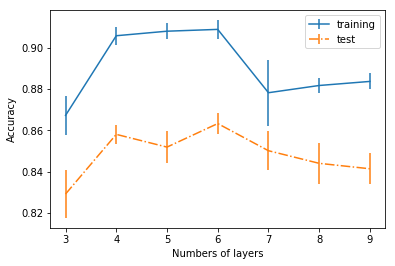

In [14]:
plt.figure()
param_range = 7
plt.errorbar(D[0:param_range], train_accuracy[0:param_range], train_stdrr[0:param_range], label='training', linestyle='-')
plt.errorbar(D[0:param_range], test_accuracy[0:param_range], test_stdrr[0:param_range], label='test', linestyle='-.')
# plt.ylim((0.50, 1.00))
plt.xlabel('Numbers of layers')
plt.ylabel('Accuracy')

plt.legend()
plt.savefig('./NN.pdf')
plt.show()